# ensemble

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# matplotlib 한글화

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [3]:
import warnings
warnings.filterwarnings(action='ignore') 

In [14]:
df = pd.read_csv('./ml_source_files/titanic_train.csv')

In [15]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
df.isna().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [18]:
df.drop('Cabin', axis = 1, inplace = True)

In [19]:
df.Age = df.Age.fillna(df.Age.mean())

In [20]:
df.dropna(inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
# x - input, y - target

In [24]:
y = df.Survived
x = df.drop(['Survived','Name','PassengerId','Ticket'], axis = 1)

In [25]:
x = pd.get_dummies(x)

In [26]:
y.value_counts()/len(y)

0    0.617548
1    0.382452
Name: Survived, dtype: float64

In [27]:
# train, test data split

In [28]:
from sklearn.model_selection import train_test_split
# stratify : y의 데이터 비율을 원본과 같이 유지해라 (y.value_counts()/len(y))
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=123, stratify=y)

#### VotingClassifier - 여러 모델을 생성하고 그 결과를 비교
---
1. Hard Voting Classifier : classifier의 결과들을 집계하여 가장 많은 표를 얻는 클래스를 최종 예측값으로 정하는 것


2. Soft Voting Classifier : 모든 분류기가 클래스의 확률을 예측할 수 있을 때 사용, 각 분류기의 예측을 평균 내어 확률이 가장 높은 클래스로 예측하게 됩니다 (가중치 투표)

In [29]:
# VotingClassifier : Voting ensemble

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

In [32]:
tree = DecisionTreeClassifier()
log = LogisticRegression()
knn = KNeighborsClassifier()
nb = GaussianNB()
# SVM방식은 확률을 제공해 주지 않기 때문에 확률 추정치 사용여부를 입력 해줘야한다.
# 내부적으로 5배 교차 검증을 사용하기 때문에 속도가 느려진다.
svc = SVC(probability=True)

# voting : hard방식과 soft방식이 있다.
# hard : 최종 아웃풋 결과 중 각 모델들이 가장많이 선택한 아웃풋을 최종 아웃풋으로 설정한다.
# soft : 최종 아웃풋 결과의 확률값을 기반으로 평균을 내어, 이중 가장 확률값이 높은 아웃풋을 최종 아웃풋으로 설정한다.
vot_h = VotingClassifier(estimators = [('log', log), ('tree', tree), ('knn', knn), ('nb', nb),\
                                     ('svc', svc)], voting='hard')
vot_s = VotingClassifier(estimators = [('log', log), ('tree', tree), ('knn', knn), ('nb', nb),\
                                     ('svc', svc)], voting='soft')

In [33]:
models = [tree, log, knn, nb, svc, vot_h, vot_s]

In [34]:
dir(tree)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_prune_tree',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_X_predict',
 '_validate_data',
 'apply',
 'ccp_alpha',
 'class_weight',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction

In [35]:
for m in models:
    m.fit(x_train, y_train)
    accuracy = m.score(x_test, y_test)
    print(m.__class__.__name__, ':', accuracy)
    print('=' * 50)

DecisionTreeClassifier : 0.7528089887640449
LogisticRegression : 0.8258426966292135
KNeighborsClassifier : 0.7078651685393258
GaussianNB : 0.8258426966292135
SVC : 0.6460674157303371
VotingClassifier : 0.7865168539325843
VotingClassifier : 0.7921348314606742


In [36]:
# ! pip install xgboost
# ! pip install lightgbm
# ! pip install catboost

In [37]:
# Boosting : 오류가 나타난 데이터에 가중치를 부여, Overfitting을 줄어준다
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [38]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb.score(x_test,y_test)

[17:50:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8089887640449438

In [39]:
lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)
lgbm.score(x_test,y_test)

0.8146067415730337

In [40]:
catboost = CatBoostClassifier()
catboost.fit(x_train, y_train)
catboost.score(x_test, y_test)

Learning rate set to 0.008906
0:	learn: 0.6882642	total: 138ms	remaining: 2m 18s
1:	learn: 0.6827508	total: 143ms	remaining: 1m 11s
2:	learn: 0.6777278	total: 146ms	remaining: 48.7s
3:	learn: 0.6722384	total: 151ms	remaining: 37.7s
4:	learn: 0.6678936	total: 154ms	remaining: 30.6s
5:	learn: 0.6631266	total: 159ms	remaining: 26.3s
6:	learn: 0.6573642	total: 163ms	remaining: 23.1s
7:	learn: 0.6527566	total: 167ms	remaining: 20.7s
8:	learn: 0.6476297	total: 171ms	remaining: 18.8s
9:	learn: 0.6424905	total: 175ms	remaining: 17.4s
10:	learn: 0.6376797	total: 180ms	remaining: 16.2s
11:	learn: 0.6326982	total: 185ms	remaining: 15.3s
12:	learn: 0.6281744	total: 191ms	remaining: 14.5s
13:	learn: 0.6258076	total: 193ms	remaining: 13.6s
14:	learn: 0.6211272	total: 198ms	remaining: 13s
15:	learn: 0.6172687	total: 202ms	remaining: 12.4s
16:	learn: 0.6132468	total: 206ms	remaining: 11.9s
17:	learn: 0.6092315	total: 209ms	remaining: 11.4s
18:	learn: 0.6050278	total: 212ms	remaining: 11s
19:	learn: 0.

185:	learn: 0.3916916	total: 349ms	remaining: 1.53s
186:	learn: 0.3913267	total: 350ms	remaining: 1.52s
187:	learn: 0.3910801	total: 351ms	remaining: 1.52s
188:	learn: 0.3906945	total: 352ms	remaining: 1.51s
189:	learn: 0.3903984	total: 353ms	remaining: 1.5s
190:	learn: 0.3901204	total: 353ms	remaining: 1.5s
191:	learn: 0.3897620	total: 354ms	remaining: 1.49s
192:	learn: 0.3893157	total: 355ms	remaining: 1.48s
193:	learn: 0.3888012	total: 356ms	remaining: 1.48s
194:	learn: 0.3885516	total: 357ms	remaining: 1.47s
195:	learn: 0.3883002	total: 358ms	remaining: 1.47s
196:	learn: 0.3878992	total: 359ms	remaining: 1.46s
197:	learn: 0.3877138	total: 359ms	remaining: 1.46s
198:	learn: 0.3872878	total: 360ms	remaining: 1.45s
199:	learn: 0.3868262	total: 361ms	remaining: 1.44s
200:	learn: 0.3861973	total: 362ms	remaining: 1.44s
201:	learn: 0.3858715	total: 363ms	remaining: 1.43s
202:	learn: 0.3853460	total: 363ms	remaining: 1.43s
203:	learn: 0.3850383	total: 364ms	remaining: 1.42s
204:	learn: 0.

349:	learn: 0.3536663	total: 479ms	remaining: 889ms
350:	learn: 0.3535293	total: 479ms	remaining: 886ms
351:	learn: 0.3532998	total: 480ms	remaining: 884ms
352:	learn: 0.3531781	total: 481ms	remaining: 881ms
353:	learn: 0.3529405	total: 482ms	remaining: 879ms
354:	learn: 0.3527268	total: 482ms	remaining: 877ms
355:	learn: 0.3525939	total: 483ms	remaining: 874ms
356:	learn: 0.3524715	total: 484ms	remaining: 872ms
357:	learn: 0.3523058	total: 485ms	remaining: 870ms
358:	learn: 0.3522861	total: 485ms	remaining: 867ms
359:	learn: 0.3520814	total: 486ms	remaining: 864ms
360:	learn: 0.3519594	total: 487ms	remaining: 862ms
361:	learn: 0.3517484	total: 488ms	remaining: 860ms
362:	learn: 0.3516354	total: 488ms	remaining: 857ms
363:	learn: 0.3514521	total: 489ms	remaining: 855ms
364:	learn: 0.3512213	total: 490ms	remaining: 853ms
365:	learn: 0.3510007	total: 491ms	remaining: 850ms
366:	learn: 0.3508785	total: 492ms	remaining: 848ms
367:	learn: 0.3507566	total: 492ms	remaining: 846ms
368:	learn: 

579:	learn: 0.3258676	total: 652ms	remaining: 472ms
580:	learn: 0.3257252	total: 653ms	remaining: 471ms
581:	learn: 0.3255805	total: 654ms	remaining: 469ms
582:	learn: 0.3255265	total: 654ms	remaining: 468ms
583:	learn: 0.3253264	total: 655ms	remaining: 467ms
584:	learn: 0.3252616	total: 656ms	remaining: 465ms
585:	learn: 0.3250909	total: 657ms	remaining: 464ms
586:	learn: 0.3249581	total: 658ms	remaining: 463ms
587:	learn: 0.3248355	total: 658ms	remaining: 461ms
588:	learn: 0.3248053	total: 659ms	remaining: 460ms
589:	learn: 0.3247564	total: 660ms	remaining: 459ms
590:	learn: 0.3247007	total: 661ms	remaining: 457ms
591:	learn: 0.3245662	total: 661ms	remaining: 456ms
592:	learn: 0.3245541	total: 662ms	remaining: 454ms
593:	learn: 0.3243964	total: 663ms	remaining: 453ms
594:	learn: 0.3243187	total: 664ms	remaining: 452ms
595:	learn: 0.3242481	total: 664ms	remaining: 450ms
596:	learn: 0.3241464	total: 665ms	remaining: 449ms
597:	learn: 0.3239676	total: 666ms	remaining: 448ms
598:	learn: 

799:	learn: 0.3023584	total: 825ms	remaining: 206ms
800:	learn: 0.3022996	total: 826ms	remaining: 205ms
801:	learn: 0.3022019	total: 827ms	remaining: 204ms
802:	learn: 0.3021429	total: 828ms	remaining: 203ms
803:	learn: 0.3019665	total: 829ms	remaining: 202ms
804:	learn: 0.3016533	total: 829ms	remaining: 201ms
805:	learn: 0.3015813	total: 830ms	remaining: 200ms
806:	learn: 0.3013962	total: 831ms	remaining: 199ms
807:	learn: 0.3013768	total: 832ms	remaining: 198ms
808:	learn: 0.3013244	total: 833ms	remaining: 197ms
809:	learn: 0.3012392	total: 833ms	remaining: 195ms
810:	learn: 0.3008740	total: 834ms	remaining: 194ms
811:	learn: 0.3007434	total: 835ms	remaining: 193ms
812:	learn: 0.3006860	total: 836ms	remaining: 192ms
813:	learn: 0.3006183	total: 836ms	remaining: 191ms
814:	learn: 0.3005436	total: 837ms	remaining: 190ms
815:	learn: 0.3003815	total: 838ms	remaining: 189ms
816:	learn: 0.3002869	total: 839ms	remaining: 188ms
817:	learn: 0.3001582	total: 839ms	remaining: 187ms
818:	learn: 

0.8370786516853933

In [41]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [42]:
x = cancer.data
y = cancer.target

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=123, stratify=y)

In [44]:
for m in models:
    m.fit(x_train, y_train)
    accuracy = m.score(x_test, y_test)
    print(m.__class__.__name__, ':', accuracy)
    print('=' * 50)

DecisionTreeClassifier : 0.9649122807017544
LogisticRegression : 0.956140350877193
KNeighborsClassifier : 0.9298245614035088
GaussianNB : 0.956140350877193
SVC : 0.9385964912280702
VotingClassifier : 0.9736842105263158
VotingClassifier : 0.9824561403508771


In [45]:
# randomforest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rtc = RandomForestClassifier()

In [48]:
rtc.fit(x_train, y_train)

RandomForestClassifier()

In [49]:
rtc.score(x_test, y_test)

0.9736842105263158

In [50]:
# Adaboost

In [51]:
from sklearn.ensemble import AdaBoostClassifier

In [52]:
ada = AdaBoostClassifier()

In [53]:
ada.fit(x_train, y_train)
ada.score(x_test, y_test)

0.9736842105263158

In [54]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb.score(x_test,y_test)

[17:50:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9912280701754386

In [55]:
lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)
lgbm.score(x_test,y_test)

0.9736842105263158

In [56]:
catboost = CatBoostClassifier()
catboost.fit(x_train, y_train)
catboost.score(x_test, y_test)

Learning rate set to 0.00736
0:	learn: 0.6804986	total: 2.78ms	remaining: 2.78s
1:	learn: 0.6695356	total: 5.28ms	remaining: 2.64s
2:	learn: 0.6588613	total: 7.77ms	remaining: 2.58s
3:	learn: 0.6483897	total: 10.4ms	remaining: 2.59s
4:	learn: 0.6366564	total: 13.1ms	remaining: 2.6s
5:	learn: 0.6271293	total: 15.7ms	remaining: 2.59s
6:	learn: 0.6155702	total: 18.2ms	remaining: 2.58s
7:	learn: 0.6065586	total: 21ms	remaining: 2.6s
8:	learn: 0.5963767	total: 23.9ms	remaining: 2.63s
9:	learn: 0.5876026	total: 26.5ms	remaining: 2.63s
10:	learn: 0.5782425	total: 29.1ms	remaining: 2.61s
11:	learn: 0.5694840	total: 31.6ms	remaining: 2.6s
12:	learn: 0.5609906	total: 34ms	remaining: 2.58s
13:	learn: 0.5518156	total: 36.7ms	remaining: 2.58s
14:	learn: 0.5434664	total: 39.5ms	remaining: 2.59s
15:	learn: 0.5348777	total: 42.4ms	remaining: 2.61s
16:	learn: 0.5266362	total: 45.1ms	remaining: 2.61s
17:	learn: 0.5187407	total: 47.5ms	remaining: 2.59s
18:	learn: 0.5106809	total: 50ms	remaining: 2.58s
19

171:	learn: 0.1059529	total: 399ms	remaining: 1.92s
172:	learn: 0.1054572	total: 401ms	remaining: 1.92s
173:	learn: 0.1048748	total: 404ms	remaining: 1.92s
174:	learn: 0.1042491	total: 406ms	remaining: 1.92s
175:	learn: 0.1033554	total: 409ms	remaining: 1.91s
176:	learn: 0.1025918	total: 411ms	remaining: 1.91s
177:	learn: 0.1017177	total: 414ms	remaining: 1.91s
178:	learn: 0.1012262	total: 416ms	remaining: 1.91s
179:	learn: 0.1005141	total: 419ms	remaining: 1.91s
180:	learn: 0.0998441	total: 421ms	remaining: 1.91s
181:	learn: 0.0993608	total: 424ms	remaining: 1.9s
182:	learn: 0.0987512	total: 426ms	remaining: 1.9s
183:	learn: 0.0980978	total: 428ms	remaining: 1.9s
184:	learn: 0.0974623	total: 430ms	remaining: 1.9s
185:	learn: 0.0969173	total: 432ms	remaining: 1.89s
186:	learn: 0.0963932	total: 434ms	remaining: 1.89s
187:	learn: 0.0959360	total: 436ms	remaining: 1.88s
188:	learn: 0.0954552	total: 438ms	remaining: 1.88s
189:	learn: 0.0948510	total: 440ms	remaining: 1.88s
190:	learn: 0.09

333:	learn: 0.0492768	total: 758ms	remaining: 1.51s
334:	learn: 0.0491408	total: 760ms	remaining: 1.51s
335:	learn: 0.0490155	total: 763ms	remaining: 1.51s
336:	learn: 0.0488653	total: 766ms	remaining: 1.51s
337:	learn: 0.0486710	total: 768ms	remaining: 1.5s
338:	learn: 0.0484702	total: 771ms	remaining: 1.5s
339:	learn: 0.0483065	total: 773ms	remaining: 1.5s
340:	learn: 0.0481490	total: 775ms	remaining: 1.5s
341:	learn: 0.0480488	total: 778ms	remaining: 1.5s
342:	learn: 0.0478611	total: 780ms	remaining: 1.49s
343:	learn: 0.0476832	total: 783ms	remaining: 1.49s
344:	learn: 0.0474604	total: 785ms	remaining: 1.49s
345:	learn: 0.0473853	total: 787ms	remaining: 1.49s
346:	learn: 0.0472060	total: 790ms	remaining: 1.49s
347:	learn: 0.0470334	total: 792ms	remaining: 1.48s
348:	learn: 0.0469148	total: 794ms	remaining: 1.48s
349:	learn: 0.0467288	total: 796ms	remaining: 1.48s
350:	learn: 0.0465672	total: 798ms	remaining: 1.48s
351:	learn: 0.0464143	total: 800ms	remaining: 1.47s
352:	learn: 0.046

531:	learn: 0.0273913	total: 1.25s	remaining: 1.1s
532:	learn: 0.0273099	total: 1.26s	remaining: 1.1s
533:	learn: 0.0272580	total: 1.26s	remaining: 1.1s
534:	learn: 0.0272075	total: 1.26s	remaining: 1.1s
535:	learn: 0.0271550	total: 1.26s	remaining: 1.09s
536:	learn: 0.0270840	total: 1.27s	remaining: 1.09s
537:	learn: 0.0270211	total: 1.27s	remaining: 1.09s
538:	learn: 0.0269684	total: 1.27s	remaining: 1.09s
539:	learn: 0.0269081	total: 1.27s	remaining: 1.08s
540:	learn: 0.0268178	total: 1.28s	remaining: 1.08s
541:	learn: 0.0267720	total: 1.28s	remaining: 1.08s
542:	learn: 0.0267186	total: 1.28s	remaining: 1.08s
543:	learn: 0.0266583	total: 1.28s	remaining: 1.08s
544:	learn: 0.0266029	total: 1.29s	remaining: 1.07s
545:	learn: 0.0265221	total: 1.29s	remaining: 1.07s
546:	learn: 0.0264817	total: 1.29s	remaining: 1.07s
547:	learn: 0.0264459	total: 1.29s	remaining: 1.07s
548:	learn: 0.0263963	total: 1.3s	remaining: 1.06s
549:	learn: 0.0263205	total: 1.3s	remaining: 1.06s
550:	learn: 0.0262

709:	learn: 0.0183111	total: 1.66s	remaining: 678ms
710:	learn: 0.0182720	total: 1.66s	remaining: 676ms
711:	learn: 0.0182329	total: 1.66s	remaining: 673ms
712:	learn: 0.0181833	total: 1.67s	remaining: 671ms
713:	learn: 0.0181466	total: 1.67s	remaining: 669ms
714:	learn: 0.0181037	total: 1.67s	remaining: 666ms
715:	learn: 0.0180710	total: 1.67s	remaining: 664ms
716:	learn: 0.0180216	total: 1.68s	remaining: 662ms
717:	learn: 0.0179890	total: 1.68s	remaining: 659ms
718:	learn: 0.0179495	total: 1.68s	remaining: 657ms
719:	learn: 0.0179045	total: 1.68s	remaining: 654ms
720:	learn: 0.0178807	total: 1.68s	remaining: 652ms
721:	learn: 0.0178161	total: 1.69s	remaining: 649ms
722:	learn: 0.0177767	total: 1.69s	remaining: 647ms
723:	learn: 0.0177657	total: 1.69s	remaining: 644ms
724:	learn: 0.0177368	total: 1.69s	remaining: 642ms
725:	learn: 0.0177080	total: 1.69s	remaining: 639ms
726:	learn: 0.0176711	total: 1.7s	remaining: 637ms
727:	learn: 0.0176351	total: 1.7s	remaining: 635ms
728:	learn: 0.

877:	learn: 0.0132405	total: 2.02s	remaining: 281ms
878:	learn: 0.0132279	total: 2.02s	remaining: 278ms
879:	learn: 0.0132260	total: 2.02s	remaining: 276ms
880:	learn: 0.0132203	total: 2.03s	remaining: 274ms
881:	learn: 0.0132047	total: 2.03s	remaining: 272ms
882:	learn: 0.0131857	total: 2.03s	remaining: 269ms
883:	learn: 0.0131589	total: 2.03s	remaining: 267ms
884:	learn: 0.0131340	total: 2.04s	remaining: 265ms
885:	learn: 0.0131229	total: 2.04s	remaining: 262ms
886:	learn: 0.0130895	total: 2.04s	remaining: 260ms
887:	learn: 0.0130639	total: 2.04s	remaining: 258ms
888:	learn: 0.0130394	total: 2.04s	remaining: 255ms
889:	learn: 0.0130272	total: 2.04s	remaining: 253ms
890:	learn: 0.0130027	total: 2.05s	remaining: 251ms
891:	learn: 0.0129739	total: 2.05s	remaining: 248ms
892:	learn: 0.0129485	total: 2.05s	remaining: 246ms
893:	learn: 0.0129189	total: 2.05s	remaining: 244ms
894:	learn: 0.0128961	total: 2.06s	remaining: 241ms
895:	learn: 0.0128833	total: 2.06s	remaining: 239ms
896:	learn: 

0.9912280701754386

In [57]:
# load datasets

In [58]:
df = pd.read_csv('./ml_source_files/loan_data.csv')

In [59]:
df.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


In [60]:
y = df['not.fully.paid']
x = df.drop('not.fully.paid',axis=1)

In [61]:
x.purpose.nunique()

7

In [62]:
x = pd.get_dummies(x)

In [63]:
x.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=123, stratify=y)

In [65]:
# VotingClassifier

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

In [67]:
for m in models:
    m.fit(x_train, y_train)
    accuracy = m.score(x_test, y_test)
    print(m.__class__.__name__, ':', accuracy)
    print('=' * 50)

DecisionTreeClassifier : 0.738517745302714
LogisticRegression : 0.8397703549060542
KNeighborsClassifier : 0.8115866388308977
GaussianNB : 0.824634655532359
SVC : 0.8397703549060542
VotingClassifier : 0.8397703549060542
VotingClassifier : 0.8402922755741128


In [68]:
# randomforest

In [69]:
rtc = RandomForestClassifier()
rtc.fit(x_train, y_train)
rtc.score(x_test, y_test)

0.8413361169102297

In [70]:
# Adaboost
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
ada.score(x_test, y_test)

0.8376826722338204

In [71]:
# gradientboost

In [72]:
# 시간이 많이 걸린다
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
gbc.score(x_test, y_test)

0.8408141962421712

In [73]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb.score(x_test,y_test)

[17:50:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.824634655532359

In [74]:
lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)
lgbm.score(x_test,y_test)

0.8366388308977035

In [75]:
catboost = CatBoostClassifier()
catboost.fit(x_train, y_train)
catboost.score(x_test, y_test)

Learning rate set to 0.024578
0:	learn: 0.6780198	total: 2.31ms	remaining: 2.3s
1:	learn: 0.6643225	total: 3.35ms	remaining: 1.67s
2:	learn: 0.6504015	total: 5.38ms	remaining: 1.79s
3:	learn: 0.6373942	total: 7.44ms	remaining: 1.85s
4:	learn: 0.6256968	total: 9.35ms	remaining: 1.86s
5:	learn: 0.6137008	total: 11.7ms	remaining: 1.94s
6:	learn: 0.6029378	total: 13.7ms	remaining: 1.95s
7:	learn: 0.5930166	total: 15.8ms	remaining: 1.95s
8:	learn: 0.5843993	total: 17.8ms	remaining: 1.96s
9:	learn: 0.5754519	total: 19.8ms	remaining: 1.96s
10:	learn: 0.5667295	total: 21.9ms	remaining: 1.97s
11:	learn: 0.5587053	total: 23.9ms	remaining: 1.97s
12:	learn: 0.5509949	total: 26ms	remaining: 1.97s
13:	learn: 0.5440525	total: 28.2ms	remaining: 1.99s
14:	learn: 0.5373656	total: 30.4ms	remaining: 2s
15:	learn: 0.5312762	total: 31.6ms	remaining: 1.94s
16:	learn: 0.5253954	total: 33.6ms	remaining: 1.94s
17:	learn: 0.5199595	total: 35.1ms	remaining: 1.91s
18:	learn: 0.5147442	total: 36.7ms	remaining: 1.89

187:	learn: 0.3899006	total: 360ms	remaining: 1.55s
188:	learn: 0.3896562	total: 362ms	remaining: 1.55s
189:	learn: 0.3895076	total: 364ms	remaining: 1.55s
190:	learn: 0.3893888	total: 366ms	remaining: 1.55s
191:	learn: 0.3891933	total: 368ms	remaining: 1.55s
192:	learn: 0.3890591	total: 370ms	remaining: 1.55s
193:	learn: 0.3888758	total: 372ms	remaining: 1.55s
194:	learn: 0.3886213	total: 375ms	remaining: 1.55s
195:	learn: 0.3885258	total: 377ms	remaining: 1.55s
196:	learn: 0.3884569	total: 379ms	remaining: 1.54s
197:	learn: 0.3883523	total: 381ms	remaining: 1.54s
198:	learn: 0.3882279	total: 383ms	remaining: 1.54s
199:	learn: 0.3881427	total: 385ms	remaining: 1.54s
200:	learn: 0.3880147	total: 387ms	remaining: 1.54s
201:	learn: 0.3879370	total: 389ms	remaining: 1.54s
202:	learn: 0.3877134	total: 391ms	remaining: 1.53s
203:	learn: 0.3876692	total: 393ms	remaining: 1.53s
204:	learn: 0.3874823	total: 395ms	remaining: 1.53s
205:	learn: 0.3873251	total: 397ms	remaining: 1.53s
206:	learn: 

375:	learn: 0.3637134	total: 722ms	remaining: 1.2s
376:	learn: 0.3635847	total: 724ms	remaining: 1.2s
377:	learn: 0.3634911	total: 726ms	remaining: 1.19s
378:	learn: 0.3634285	total: 728ms	remaining: 1.19s
379:	learn: 0.3632698	total: 730ms	remaining: 1.19s
380:	learn: 0.3630963	total: 732ms	remaining: 1.19s
381:	learn: 0.3630091	total: 734ms	remaining: 1.19s
382:	learn: 0.3628329	total: 736ms	remaining: 1.19s
383:	learn: 0.3625945	total: 738ms	remaining: 1.18s
384:	learn: 0.3624912	total: 740ms	remaining: 1.18s
385:	learn: 0.3623377	total: 742ms	remaining: 1.18s
386:	learn: 0.3622076	total: 743ms	remaining: 1.18s
387:	learn: 0.3621140	total: 745ms	remaining: 1.18s
388:	learn: 0.3620643	total: 747ms	remaining: 1.17s
389:	learn: 0.3619833	total: 749ms	remaining: 1.17s
390:	learn: 0.3618977	total: 751ms	remaining: 1.17s
391:	learn: 0.3617143	total: 753ms	remaining: 1.17s
392:	learn: 0.3616056	total: 755ms	remaining: 1.17s
393:	learn: 0.3615476	total: 756ms	remaining: 1.16s
394:	learn: 0.

567:	learn: 0.3389156	total: 1.08s	remaining: 825ms
568:	learn: 0.3388365	total: 1.09s	remaining: 824ms
569:	learn: 0.3387190	total: 1.09s	remaining: 822ms
570:	learn: 0.3385833	total: 1.09s	remaining: 820ms
571:	learn: 0.3384790	total: 1.09s	remaining: 818ms
572:	learn: 0.3384696	total: 1.09s	remaining: 816ms
573:	learn: 0.3382968	total: 1.1s	remaining: 814ms
574:	learn: 0.3381968	total: 1.1s	remaining: 812ms
575:	learn: 0.3380638	total: 1.1s	remaining: 811ms
576:	learn: 0.3380573	total: 1.1s	remaining: 809ms
577:	learn: 0.3379741	total: 1.1s	remaining: 807ms
578:	learn: 0.3378381	total: 1.11s	remaining: 805ms
579:	learn: 0.3377093	total: 1.11s	remaining: 803ms
580:	learn: 0.3375570	total: 1.11s	remaining: 801ms
581:	learn: 0.3374668	total: 1.11s	remaining: 799ms
582:	learn: 0.3372773	total: 1.11s	remaining: 797ms
583:	learn: 0.3371577	total: 1.12s	remaining: 795ms
584:	learn: 0.3371531	total: 1.12s	remaining: 793ms
585:	learn: 0.3369524	total: 1.12s	remaining: 791ms
586:	learn: 0.336

759:	learn: 0.3169073	total: 1.45s	remaining: 457ms
760:	learn: 0.3167529	total: 1.45s	remaining: 455ms
761:	learn: 0.3166646	total: 1.45s	remaining: 454ms
762:	learn: 0.3165761	total: 1.45s	remaining: 452ms
763:	learn: 0.3164831	total: 1.46s	remaining: 450ms
764:	learn: 0.3163532	total: 1.46s	remaining: 448ms
765:	learn: 0.3162973	total: 1.46s	remaining: 446ms
766:	learn: 0.3161463	total: 1.46s	remaining: 444ms
767:	learn: 0.3161376	total: 1.46s	remaining: 442ms
768:	learn: 0.3160733	total: 1.47s	remaining: 440ms
769:	learn: 0.3159343	total: 1.47s	remaining: 438ms
770:	learn: 0.3158499	total: 1.47s	remaining: 436ms
771:	learn: 0.3156551	total: 1.47s	remaining: 435ms
772:	learn: 0.3155308	total: 1.47s	remaining: 433ms
773:	learn: 0.3154266	total: 1.48s	remaining: 431ms
774:	learn: 0.3154224	total: 1.48s	remaining: 429ms
775:	learn: 0.3153077	total: 1.48s	remaining: 427ms
776:	learn: 0.3151742	total: 1.48s	remaining: 425ms
777:	learn: 0.3150417	total: 1.48s	remaining: 423ms
778:	learn: 

933:	learn: 0.2989721	total: 1.81s	remaining: 128ms
934:	learn: 0.2988753	total: 1.81s	remaining: 126ms
935:	learn: 0.2987091	total: 1.81s	remaining: 124ms
936:	learn: 0.2986426	total: 1.81s	remaining: 122ms
937:	learn: 0.2985324	total: 1.82s	remaining: 120ms
938:	learn: 0.2985119	total: 1.82s	remaining: 118ms
939:	learn: 0.2984469	total: 1.82s	remaining: 116ms
940:	learn: 0.2982700	total: 1.82s	remaining: 114ms
941:	learn: 0.2981418	total: 1.82s	remaining: 112ms
942:	learn: 0.2980013	total: 1.83s	remaining: 110ms
943:	learn: 0.2978418	total: 1.83s	remaining: 108ms
944:	learn: 0.2977735	total: 1.83s	remaining: 107ms
945:	learn: 0.2976902	total: 1.83s	remaining: 105ms
946:	learn: 0.2976190	total: 1.83s	remaining: 103ms
947:	learn: 0.2974994	total: 1.83s	remaining: 101ms
948:	learn: 0.2974414	total: 1.84s	remaining: 98.8ms
949:	learn: 0.2972462	total: 1.84s	remaining: 96.8ms
950:	learn: 0.2971580	total: 1.84s	remaining: 94.9ms
951:	learn: 0.2970534	total: 1.84s	remaining: 93ms
952:	learn

0.8376826722338204

# Clustering (군집화)

- Recommendation Engines(추천 엔진) : 개인화된 사용자 경험을 제공하기위해 상품들을 그룹화 합니다
- Search Engines(검색 엔진) : 뉴스 토픽들과 검색 결과를 그룹화 합니다
- Market Segmentation(시장 세분화) : 지역, 인구, 행동 등을 바탕으로 고객을 그룹화 합니다


- target data를 제공해주지 않는다.

## K-Means Clustering
---
- 데이터셋에서 K 개의 centroids를 임의로 지정합니다.
- 각 데이터들을 가장 가까운 centroids가 속한 그룹에 할당합니다.
- 2번 과정에서 할당된 결과를 바탕으로 centroids를 새롭게 지정합니다.
- 2 ~ 3번 과정을 centroids가 더 이상 변하지 않을 때 까지 반복합니다.

<!-- ![Img](https://i.imgur.com/WL1tIZ4.gif) -->

In [76]:
from sklearn.datasets import make_blobs

In [77]:
# 데이터를 생성해주는 함수 : make_blobs
# cluster_std : 데이터의 분산(데이터 그룹끼리의 분산)은 1.8, centers : 데이터의 그룹은 3개
data = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=3)

In [78]:
data

(array([[ 4.64127450e+00,  8.75786559e+00],
        [ 1.03664032e+01,  4.15287928e+00],
        [-3.41830105e+00,  3.16560596e+00],
        [ 9.43475688e-01,  8.43688763e+00],
        [ 6.16912025e+00,  1.43216755e+00],
        [ 1.55910166e+00,  4.58515986e-02],
        [-8.69048194e-01,  5.05646399e+00],
        [ 5.34243996e+00,  9.01621317e+00],
        [ 4.02788039e+00,  8.43329731e+00],
        [ 1.94181813e+00,  1.00432955e+01],
        [ 4.89255424e-01,  9.95826629e+00],
        [ 2.56494474e+00,  5.35721962e+00],
        [ 3.11385166e+00,  8.36645333e+00],
        [ 7.07287107e-01,  8.22513751e+00],
        [ 3.42571194e+00,  1.23908700e+01],
        [ 7.68790185e+00,  7.27801285e+00],
        [ 2.36854037e+00,  8.15724369e+00],
        [ 5.64490106e+00,  6.39324423e+00],
        [ 3.46613707e+00,  2.58161534e+00],
        [ 5.00593980e+00,  9.73612084e+00],
        [ 2.61179668e-01,  3.60589109e+00],
        [ 9.23821847e+00,  8.58031272e+00],
        [ 3.61218406e+00,  5.110

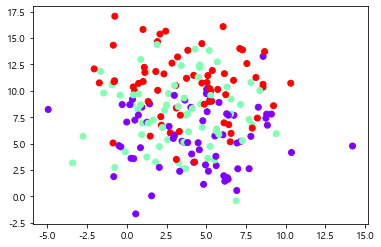

In [79]:
# data[0] : 실제 데이터, data[1] : label
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow')

In [80]:
from sklearn.cluster import KMeans

In [81]:
# 랜덤하게 center point를 3개 찍는다
kmeans = KMeans(n_clusters=3)

In [82]:
kmeans.fit(data[0])

KMeans(n_clusters=3)

In [83]:
# center의 좌표값
kmeans.cluster_centers_

array([[ 6.50002027,  9.73473744],
       [ 3.74663101,  4.01125831],
       [ 1.10367695, 10.32164178]])

In [84]:
kmeans.labels_

array([0, 1, 1, 2, 1, 1, 1, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0,
       1, 2, 0, 2, 0, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1,
       1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0,
       0, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 1,
       0, 0, 2, 2, 2, 2, 1, 1, 1, 0, 2, 0, 1, 1, 2, 1, 0, 2, 2, 0, 1, 2,
       0, 2, 2, 1, 1, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2,
       2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0, 1, 0, 2, 2, 2, 2, 1, 1, 0,
       0, 0, 2, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 1,
       2, 2])

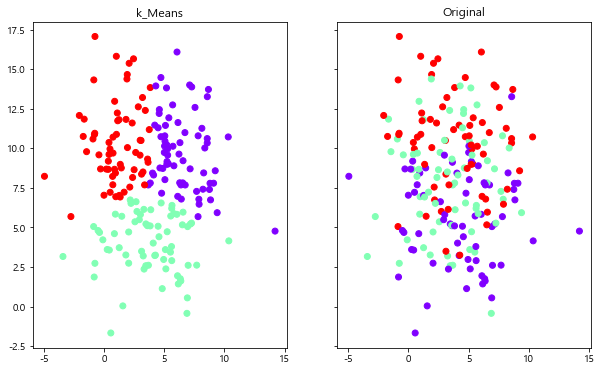

In [85]:
# (1,2)의 그래프 출력
f, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,6))
ax1.set_title('k_Means')
ax1.scatter(data[0][:,0], data[0][:,1], c=kmeans.labels_, cmap='rainbow')
ax2.set_title('Original')
ax2.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow')

In [86]:
df = pd.read_csv('./ml_source_files/College_Data', index_col=0)

In [87]:
df.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


In [88]:
df.Private.value_counts()

Yes    565
No     212
Name: Private, dtype: int64

In [89]:
private = df.Private.apply(lambda x : 1 if x == 'Yes' else 0)

In [90]:
df.drop('Private', axis=1, inplace = True)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    int64  
 1   Accept       777 non-null    int64  
 2   Enroll       777 non-null    int64  
 3   Top10perc    777 non-null    int64  
 4   Top25perc    777 non-null    int64  
 5   F.Undergrad  777 non-null    int64  
 6   P.Undergrad  777 non-null    int64  
 7   Outstate     777 non-null    int64  
 8   Room.Board   777 non-null    int64  
 9   Books        777 non-null    int64  
 10  Personal     777 non-null    int64  
 11  PhD          777 non-null    int64  
 12  Terminal     777 non-null    int64  
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    int64  
 15  Expend       777 non-null    int64  
 16  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16)
memory usage: 109.3+

In [92]:
# 2개의 군집으로 미국대학을 clustering하고, 결과를 private과 비교

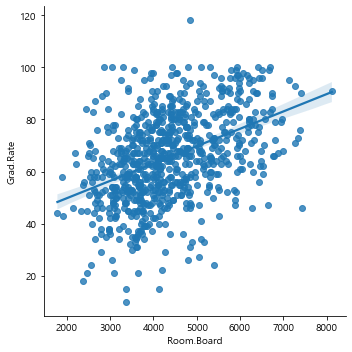

In [93]:
sns.lmplot('Room.Board', 'Grad.Rate', data = df)

In [94]:
from sklearn.cluster import KMeans

In [95]:
kms = KMeans(n_clusters=2)

In [96]:
kms.fit(df)

KMeans(n_clusters=2)

In [97]:
kms.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01]])

In [98]:
kms.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

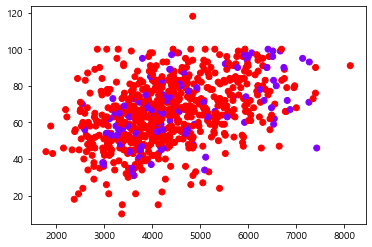

In [99]:
plt.scatter(df['Room.Board'], df['Grad.Rate'], c=kms.labels_, cmap='rainbow')

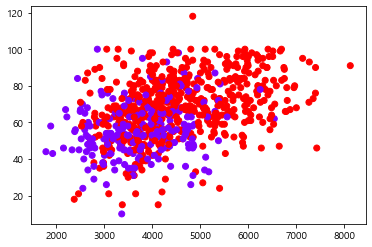

In [100]:
plt.scatter(df['Room.Board'], df['Grad.Rate'], c=private.values, cmap='rainbow')

In [101]:
1 - np.mean(private.values == kms.labels_)

0.2213642213642214

# model_improvement

In [102]:
# ! pip install mglearn

In [103]:
import mglearn

### Knn(최근접이웃) 알고리즘

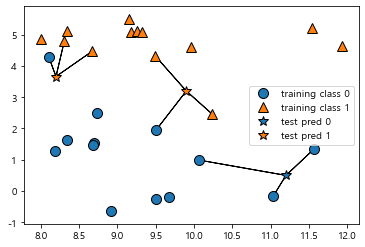

In [104]:
# 학습용 데이터 시각화
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [105]:
x,y = mglearn.datasets.make_forge()

In [106]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [108]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [109]:
knn.score(x_train,y_train)

0.9

In [110]:
knn.score(x_test,y_test)

1.0

### 과적합(overfitting)
- 알고리즘이 train data에 과도하게 학습이 되어, train data는 잘 맞추지만 test data를 잘 못맞추는 현상
- 모델이 train data를 잘 맞추도록 지나치게 복잡하게 만들어진 경우


#### 과적합을 해소
- 데이터를 많이 확보
- 모델의 단순화

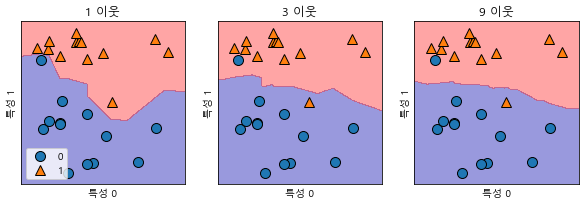

In [111]:
# axes : 그래프 (1,3)개
fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    knn = KNeighborsClassifier(n_neighbors = n_neighbors).fit(x,y)
    mglearn.plots.plot_2d_separator(knn, x, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(x[:,0],x[:,1], y, ax=ax)
    ax.set_title('{} 이웃'.format(n_neighbors))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend(loc=3)

In [112]:
# multiclass classification

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [113]:
x = cancer.data
y = cancer.target

In [114]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=cancer.target, random_state=66)

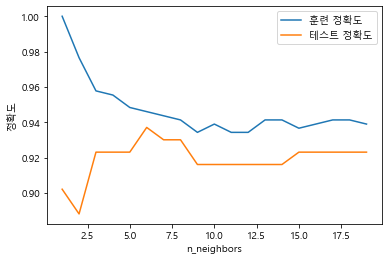

In [115]:
training_accuracy = []
test_accuracy = []

for k in range(1,20):
    clf = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
    
    training_accuracy.append(clf.score(x_train,y_train))
    
    test_accuracy.append(clf.score(x_test,y_test))


plt.plot(list(range(1,20)), training_accuracy, label= '훈련 정확도')
plt.plot(list(range(1,20)), test_accuracy, label= '테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()

In [116]:
# 전체적으로 train data accuracy > test data accuracy

# 과적합 (k=1) : 모델이 복잡함
# train data accuracy > test data accuracy

# 과소적합 (k>=10) : 모델이 학습이 부족해서 예측능력이 낮은 경우
# train data와 test data의 정확도가 둘 다 낮다

[DecisionTree Classifier 내장 파라미터](https://injo.tistory.com/15)

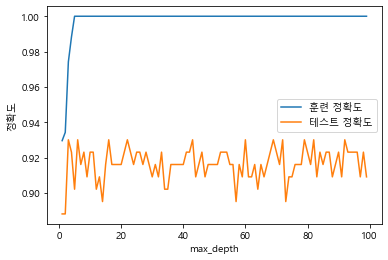

In [117]:
from sklearn.tree import DecisionTreeClassifier

training_accuracy = []
test_accuracy = []

for k in range(1,100,1):
    clf = DecisionTreeClassifier(max_depth=k).fit(x_train,y_train)
    
    training_accuracy.append(clf.score(x_train,y_train))
    
    test_accuracy.append(clf.score(x_test,y_test))


plt.plot(list(range(1,100,1)), training_accuracy, label= '훈련 정확도')
plt.plot(list(range(1,100,1)), test_accuracy, label= '테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('max_depth')
# legend : 범례
plt.legend()

In [118]:
df = pd.read_csv('./ml_source_files/loan_data.csv')

In [119]:
y = df['not.fully.paid']
x = df.drop('not.fully.paid',axis=1)
x = pd.get_dummies(x)

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=66)

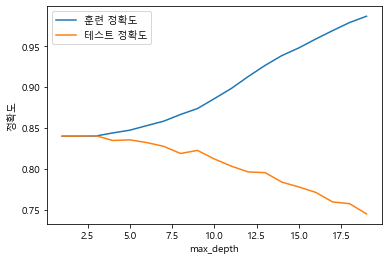

In [121]:
from sklearn.tree import DecisionTreeClassifier

training_accuracy = []
test_accuracy = []

for k in range(1,20,1):
    clf = DecisionTreeClassifier(max_depth=k).fit(x_train,y_train)
    
    training_accuracy.append(clf.score(x_train,y_train))
    
    test_accuracy.append(clf.score(x_test,y_test))


plt.plot(list(range(1,20,1)), training_accuracy, label= '훈련 정확도')
plt.plot(list(range(1,20,1)), test_accuracy, label= '테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('max_depth')
# legend : 범례
plt.legend()

### 회귀분석의 과적합

In [122]:
house_df = pd.read_csv('./ml_source_files/house_price.csv')

In [123]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [124]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [125]:
house_df.isna().sum().sort_values()

Id                  0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
                 ... 
FireplaceQu       690
Fence            1179
Alley            1369
MiscFeature      1406
PoolQC           1453
Length: 81, dtype: int64

In [126]:
house_df.drop(['PoolQC','MiscFeature','Alley','FireplaceQu','LotFrontage'], axis= 1, inplace = True)

In [127]:
house_df.fillna(house_df.mean(), inplace = True)

In [128]:
house_df.isna().sum().sort_values(ascending=False)

Fence           1179
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
                ... 
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
MSSubClass         0
SalePrice          0
Length: 76, dtype: int64

In [129]:
house_df_one = pd.get_dummies(house_df)

In [130]:
house_df_one.isna().sum().sort_values(ascending=False)

Id                       0
BsmtQual_Ex              0
BsmtCond_Po              0
BsmtCond_Gd              0
BsmtCond_Fa              0
                        ..
Condition2_Feedr         0
Condition2_Norm          0
Condition2_PosA          0
Condition2_PosN          0
SaleCondition_Partial    0
Length: 275, dtype: int64

In [131]:
house_df_one.shape

(1460, 275)

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [133]:
y = house_df_one['SalePrice']
x = house_df_one.drop(['SalePrice','Id'], axis = 1)

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [135]:
lr = LinearRegression()

In [136]:
lr.fit(x_train, y_train)

LinearRegression()

In [137]:
train_preds = lr.predict(x_train)
test_preds = lr.predict(x_test)

In [138]:
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

In [139]:
print(train_mse, test_mse, train_mse/test_mse)
# train에서 오차가 매우 작음 => 과적합 => 모델을 단순화

353292421.8931927 1158927038.0755298 0.30484440373386806


In [140]:
# coef : 회귀계수
# 복잡하다는 말은 train data에 overfitting되어있다
print(len(lr.coef_))   # 계수가 273개인 매우 복합한 회귀모델

273


In [141]:
lr.coef_

array([-7.04576297e+01,  8.73719502e-01,  5.68189298e+03,  6.11326112e+03,
        4.23901841e+02,  3.00001811e+01,  2.30168513e+01,  1.73597065e+01,
        1.03529156e+01, -3.79506552e+00,  2.39175242e+01,  2.70665944e+01,
        4.20781725e+01, -3.91090866e+01,  3.00354949e+01,  6.23191187e+02,
       -8.78954837e+02,  4.61108629e+03,  2.66422149e+03, -2.41370438e+03,
       -2.13426640e+04,  2.03608730e+02,  3.12886538e+02, -2.32092050e+01,
        6.70870704e+03,  5.80412714e+00,  1.41691880e+01,  1.08545884e+01,
        8.34361415e+00,  3.41359575e+01,  4.05934251e+01,  7.56518544e+01,
        1.39625194e-02, -5.88124366e+02, -4.13593910e+02, -6.23443578e+03,
       -7.77491320e+02,  1.53368529e+03,  3.42000046e+03,  2.05824136e+03,
       -1.00777722e+04,  1.00777722e+04, -1.36620875e+03,  1.69056508e+03,
        1.66422078e+03, -1.98857711e+03,  3.81239112e+02,  4.85702100e+03,
       -9.88831455e+03,  4.65005443e+03,  1.55508942e+04, -1.55508942e+04,
        1.52419746e+03,  

### 회귀모델의 과적합 해소 => 회귀모델을 단순화


1. 변수의 수를 줄인다 => lasso
2. 계수의 값을 작게 만든다 => ridge

![lasso](https://blog.kakaocdn.net/dn/oFkgA/btqEOZ9Mvqs/vpPbuweQgURzQRBlC2Fl3K/img.png)

In [142]:
from sklearn.linear_model import Ridge, Lasso

In [143]:
# alpha가 커질수록 계수가 0에 가까워진다
rid = Ridge(alpha = 10)
rid.fit(x_train, y_train)
rid_train_preds = rid.predict(x_train)
rid_test_preds = rid.predict(x_test)

rid_train_mse = mean_squared_error(y_train,rid_train_preds)
rid_test_mse = mean_squared_error(y_test,rid_test_preds)
print(rid_train_mse, rid_test_mse, rid_train_mse/rid_test_mse)

664879219.1798135 683167535.8407248 0.9732301145744503


In [144]:
las = Lasso(alpha = 1000)
las.fit(x_train, y_train)
las_train_preds = las.predict(x_train)
las_test_preds = las.predict(x_test)

las_train_mse = mean_squared_error(y_train,las_train_preds)
las_test_mse = mean_squared_error(y_test,las_test_preds)
print(las_train_mse, las_test_mse, las_train_mse/las_test_mse)

1107674160.9451919 725967502.9447112 1.525790281868238


In [145]:
from sklearn.metrics import r2_score

In [146]:
train_acc = []
test_acc = []
mse_ratio = []

for i in np.arange(0.001, 1, 0.001):
    rid = Ridge(alpha = i)
    rid.fit(x_train, y_train)
    rid_train_preds = rid.predict(x_train)
    rid_test_preds = rid.predict(x_test)

    rid_train_mse = mean_squared_error(y_train,rid_train_preds)
    rid_test_mse = mean_squared_error(y_test,rid_test_preds)

    train_acc.append(r2_score(y_train, rid_train_preds))
    test_acc.append(r2_score(y_test, rid_test_preds))
    mse_ratio.append(rid_train_mse/rid_test_mse)

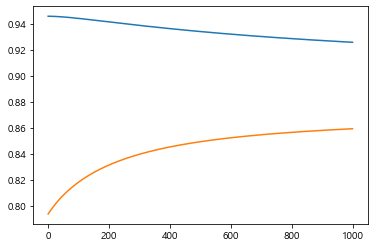

In [147]:
plt.plot(train_acc)
plt.plot(test_acc)